In [68]:
# Importing the Libraries:
import numpy as np 
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import statsmodels.api as sm
import statistics
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble.forest import RandomForestRegressor
from sklearn.metrics import r2_score

# G2M insight for Cab Investment firm:
Data sets given are all in Csv file format:

Cab_data :-Details regarding Transaction Ids,travel dates,Cab company,distance travelled,costs and prices
Customer_ID:-Customer details about gender, their age and Income.
Transaction_ID:-Transaction information like payment method
City:-Details about the cities in which cabs operates, number of users and population demographics

#Study the given data sets:
Cab_data

In [3]:
Cabdata=pd.read_csv("D:\DataGlacier\Week2_EDA\Cab_Data.csv",low_memory=False)
Cabdata

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10004281,31-01-2016,Pink Cab,CHICAGO IL,30.69,406.90,349.8660,57.0340
1,10004305,31-01-2016,Pink Cab,CHICAGO IL,28.00,416.11,327.6000,88.5100
2,10004315,31-01-2016,Pink Cab,LOS ANGELES CA,32.48,396.67,363.7760,32.8940
3,10004321,31-01-2016,Pink Cab,LOS ANGELES CA,5.88,69.52,68.7960,0.7240
4,10004325,31-01-2016,Pink Cab,LOS ANGELES CA,34.92,435.54,401.5800,33.9600
...,...,...,...,...,...,...,...,...
355027,10439960,31-12-2018,Yellow Cab,WASHINGTON DC,33.93,474.47,411.2316,63.2384
355028,10439984,31-12-2018,Yellow Cab,WASHINGTON DC,40.00,641.78,484.8000,156.9800
355029,10440028,31-12-2018,Yellow Cab,WASHINGTON DC,26.22,405.25,327.2256,78.0244
355030,10440034,31-12-2018,Yellow Cab,WASHINGTON DC,34.68,505.38,470.2608,35.1192


In [3]:
Cabdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355032 entries, 0 to 355031
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  355032 non-null  int64  
 1   Date of Travel  355032 non-null  object 
 2   Company         355032 non-null  object 
 3   City            355032 non-null  object 
 4   KM Travelled    355032 non-null  float64
 5   Price Charged   355032 non-null  float64
 6   Cost of Trip    355032 non-null  float64
 7   Profit          355032 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 21.7+ MB


In [4]:
# View of basic statistical details:

In [4]:
Cabdata.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Profit
count,3.550320e+05,355032.000000,355032.000000,355032.000000,355032.000000
mean,1.022344e+07,22.566598,422.742351,286.165041,136.577310
std,1.252472e+05,12.234181,273.830796,157.997162,159.790582
min,1.000426e+07,1.900000,15.600000,19.000000,-220.060000
25%,1.011460e+07,12.000000,206.160000,151.200000,27.780900
50%,1.022379e+07,22.440000,385.870000,282.464000,81.461000
75%,1.033225e+07,32.960000,582.692500,413.683200,189.072000
max,1.044011e+07,48.000000,2048.030000,691.200000,1463.966000


Avg KM Travelled-22.56 miles,Price Charged-$422.74,Cost of each trip-$286.16

In [5]:
Cabdata.dtypes

Transaction ID      int64
Date of Travel     object
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
Profit            float64
dtype: object

Number of unique Companies,Cities:

In [6]:
Cabdata['Company'].nunique()

2

In [7]:
Cabdata['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [8]:
Cabdata['City'].nunique()


19

In [9]:
Cabdata['City'].unique()

array(['CHICAGO IL', 'LOS ANGELES CA', 'MIAMI FL', 'SAN DIEGO CA',
       'SEATTLE WA', 'SILICON VALLEY', 'TUCSON AZ', 'WASHINGTON DC',
       'ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'DALLAS TX', 'NEW YORK NY',
       'ORANGE COUNTY', 'PITTSBURGH PA', 'NASHVILLE TN', 'DENVER CO',
       'SACRAMENTO CA', 'PHOENIX AZ'], dtype=object)

In [10]:
#Check for any null values:

In [11]:
Cabdata.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
Profit            0
dtype: int64

In [12]:
#Check for any duplicate values:
(Cabdata.duplicated().sum())

0

City Data:

In [4]:
Citydata=pd.read_csv("D:\DataGlacier\Week2_EDA\City.csv",low_memory=False)
Citydata

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [14]:
Citydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


The data types for columnns(features) Users and Population are object, we convert them to interger types because we require them for the analysis later.

In [5]:
Citydata.Population = [Citydata.Population[i].replace(",", "") for i in range(len(Citydata))]
Citydata.Users = [Citydata.Users[i].replace(",", "") for i in range(len(Citydata))]
Citydata.head(2)


,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468


In [6]:
Citydata['Users'] = pd.to_numeric(Citydata['Users'], errors="coerce")
Citydata['Population'] = pd.to_numeric(Citydata['Population'], errors="coerce")

In [7]:
Citydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [8]:
Citydata.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


Checking for Null,duplicated records:

In [19]:
(Citydata.duplicated().sum())

0

In [20]:
(Citydata.isnull().sum())

City          0
Population    0
Users         0
dtype: int64

Customer_ID dataset:

In [7]:
Customerdata=pd.read_csv("D:\DataGlacier\Week2_EDA\Customer_ID.csv",low_memory=False)
Customerdata

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [10]:
Customerdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [11]:
Customerdata.describe(include='all')

,Customer ID,Gender,Age,Income (USD/Month)
count,49171.000000,49171,49171.000000,49171.000000
unique,NaN,2,NaN,NaN
top,NaN,Male,NaN,NaN
freq,NaN,26562,NaN,NaN
mean,28398.252283,NaN,35.363121,15015.631856
std,17714.137333,NaN,12.599066,8002.208253
min,1.000000,NaN,18.000000,2000.000000
25%,12654.500000,NaN,25.000000,8289.500000
50%,27631.000000,NaN,33.000000,14656.000000
75%,43284.500000,NaN,42.000000,21035.000000


Checking for any Null and duplicates:

In [24]:
Customerdata.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [25]:
Customerdata.duplicated().sum()

0

Trasaction_ID data set:

In [8]:
Transactiondata=pd.read_csv("D:\DataGlacier\Week2_EDA\Transaction_ID.csv",low_memory=False)
Transactiondata

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [27]:
Transactiondata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [28]:
Transactiondata.describe(include='all')

,Transaction ID,Customer ID,Payment_Mode
count,4.400980e+05,440098.000000,440098
unique,NaN,NaN,2
top,NaN,NaN,Card
freq,NaN,NaN,263991
mean,1.022006e+07,23619.513120,NaN
std,1.270455e+05,21195.549816,NaN
min,1.000001e+07,1.000000,NaN
25%,1.011004e+07,3530.000000,NaN
50%,1.022006e+07,15168.000000,NaN
75%,1.033008e+07,43884.000000,NaN


Check the data set for Null or duplicated values:

In [29]:
Transactiondata.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [30]:
Transactiondata.duplicated().sum()

0

Cab data contains feature Transaction ID which holds key to data set Transaction_ID dataset which in turn holds key to connect Customer_ID data details via Customer_ID key hence we merge these data set along with appending the details if City dataset through the feature City.

In [9]:
Masterdata=Cabdata.merge(Transactiondata,on='Transaction ID').merge(Customerdata,on='Customer ID').merge(Citydata,on='City')
Masterdata

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10004281,31-01-2016,Pink Cab,CHICAGO IL,30.69,406.90,349.8660,57.0340,5323,Card,Male,33,20049,1955130,164468
1,10009629,13-02-2016,Yellow Cab,CHICAGO IL,29.90,506.31,409.0320,97.2780,5323,Card,Male,33,20049,1955130,164468
2,10062625,12/8/2016,Yellow Cab,CHICAGO IL,45.20,634.55,542.4000,92.1500,5323,Card,Male,33,20049,1955130,164468
3,10065273,14-08-2016,Yellow Cab,CHICAGO IL,18.70,249.97,255.8160,-5.8460,5323,Card,Male,33,20049,1955130,164468
4,10067889,24-08-2016,Yellow Cab,CHICAGO IL,16.83,254.35,228.2148,26.1352,5323,Card,Male,33,20049,1955130,164468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355027,10435904,28-12-2018,Yellow Cab,PHOENIX AZ,20.52,305.98,275.7888,30.1912,21845,Cash,Female,19,5342,943999,6133
355028,10435894,29-12-2018,Yellow Cab,PHOENIX AZ,37.05,564.60,533.5200,31.0800,21873,Card,Male,23,13561,943999,6133
355029,10435895,29-12-2018,Yellow Cab,PHOENIX AZ,26.52,391.10,378.7056,12.3944,22911,Card,Male,30,4577,943999,6133
355030,10435903,29-12-2018,Yellow Cab,PHOENIX AZ,28.00,449.63,403.2000,46.4300,23523,Card,Male,43,15328,943999,6133


<Figure size 432x288 with 0 Axes>

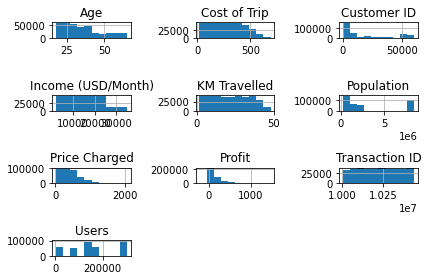

In [14]:
plt.savefig('Univariate Visualizations.jpg')
Masterdata[['Transaction ID','Date of Travel','Company','City',	'KM Travelled','Price Charged','Cost of Trip','Profit','Customer ID','Payment_Mode','Gender','Age','Income (USD/Month)','Population','Users']].hist()
plt.tight_layout()

# Exploratory Data Analysis(EDA)

Analysis of the entire data set and by each feature

In [15]:
correlation=Masterdata.corr()
correlation

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Age,Income (USD/Month),Population,Users
Transaction ID,1.000000,-0.001370,-0.049820,-0.003272,-0.082140,-0.015735,-0.001196,-0.001482,0.021747,0.012176
KM Travelled,-0.001370,1.000000,0.835963,0.981836,0.461761,0.000109,-0.000132,-0.000940,-0.002240,-0.000400
Price Charged,-0.049820,0.835963,1.000000,0.859982,0.863355,-0.177805,-0.002842,0.002843,0.327600,0.282010
Cost of Trip,-0.003272,0.981836,0.859982,1.000000,0.484963,0.002818,0.000046,-0.001038,0.015221,0.023673
Profit,-0.082140,0.461761,0.863355,0.484963,1.000000,-0.307488,-0.004915,0.005899,0.546353,0.459869
Customer ID,-0.015735,0.000109,-0.177805,0.002818,-0.307488,1.000000,-0.004710,-0.013807,-0.647301,-0.610952
Age,-0.001196,-0.000132,-0.002842,0.000046,-0.004915,-0.004710,1.000000,0.003966,-0.009026,-0.005866
Income (USD/Month),-0.001482,-0.000940,0.002843,-0.001038,0.005899,-0.013807,0.003966,1.000000,0.011716,0.010271
Population,0.021747,-0.002240,0.327600,0.015221,0.546353,-0.647301,-0.009026,0.011716,1.000000,0.915635
Users,0.012176,-0.000400,0.282010,0.023673,0.459869,-0.610952,-0.005866,0.010271,0.915635,1.000000


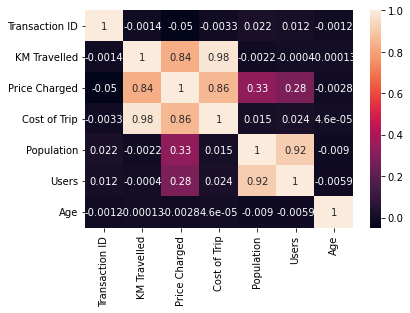

In [34]:
heatmapdata = Masterdata[['Transaction ID','Date of Travel','Company','City','KM Travelled','Price Charged','Cost of Trip','Population','Users','Age']]
sns.heatmap(heatmapdata.corr(), annot=True)
plt.show()

There exists a linear positive correlation between * features KM Travelled, Price Charged, Cost of Trip 
and * features Population and Users

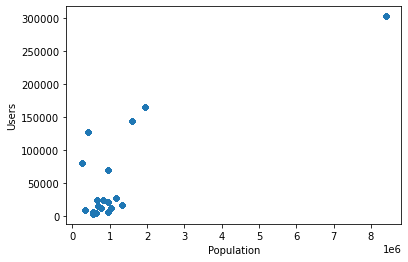

In [34]:
Masterdata.plot(x='Population', y = 'Users', kind='scatter')
plt.show()

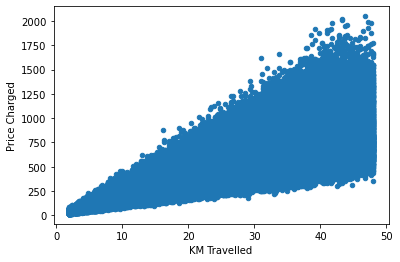

In [35]:
Masterdata.plot(x='KM Travelled', y = 'Price Charged', kind='scatter')
plt.show()

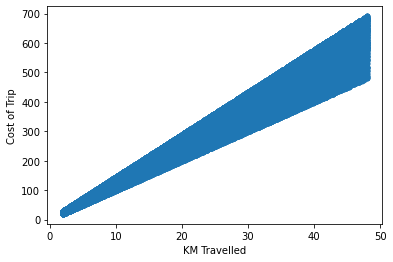

In [36]:
Masterdata.plot(x='KM Travelled', y = 'Cost of Trip', kind='scatter')
plt.show()

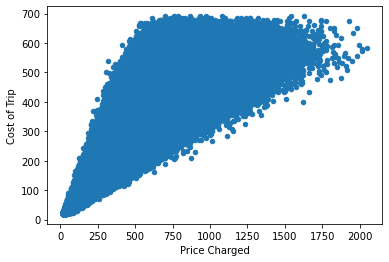

In [37]:
Masterdata.plot(x='Price Charged', y = 'Cost of Trip', kind='scatter')
plt.show()

In [54]:
#Outlier Detection-Continuous Variables Box Plots

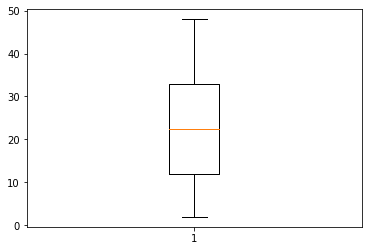

In [55]:
plt.boxplot('KM Travelled',data=Masterdata)
plt.show()

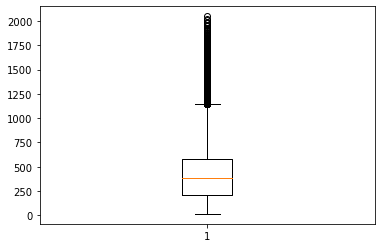

In [56]:
plt.boxplot('Price Charged',data=Masterdata)
plt.show()

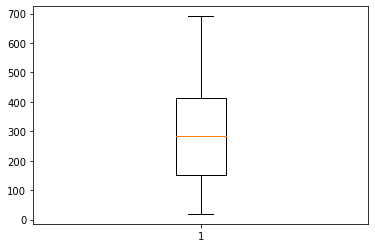

In [57]:
plt.boxplot('Cost of Trip',data=Masterdata)
plt.show()

Clearly, feature(column) 'Price Changed' contains Outliers

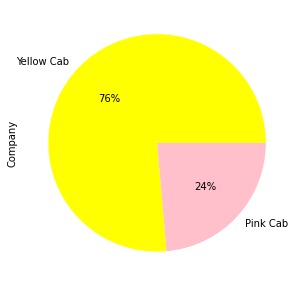

In [25]:
mycolor=['yellow','pink']
Masterdata.Company.value_counts().plot.pie(y='Company', figsize=(5, 5), autopct='%1.0f%%',colors=mycolor)

Yellow cab has majority coverage with 76% 

In [26]:
#Number of Transactions occured by each Company

In [29]:
a1=Masterdata.groupby(['Company'])['Transaction ID'].count()
a1

Company
Pink Cab       83825
Yellow Cab    271207
Name: Transaction ID, dtype: int64

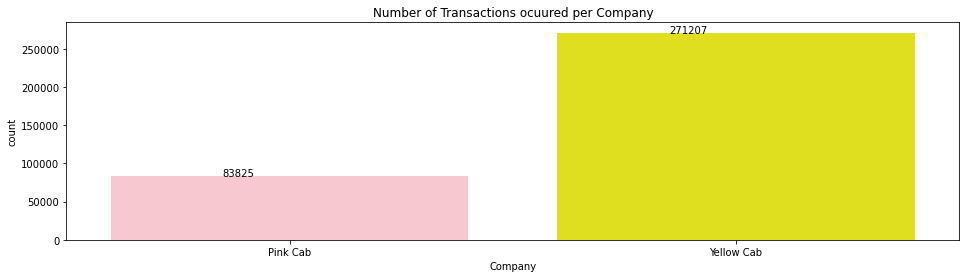

In [50]:
plt.figure(figsize=(16,4))
plt.title('Number of Transactions occured per Company')
ax=sns.countplot(data=Masterdata,x='Company',palette=['pink','yellow'])

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()
    

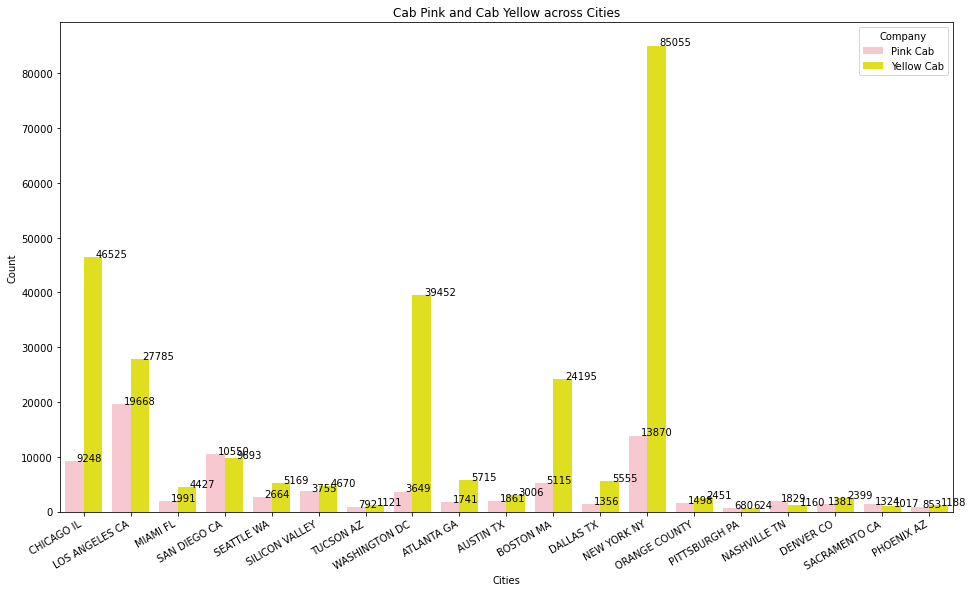

In [51]:
#Company prominence by City:

plt.figure(figsize=(16,9))
plt.title('Cab Pink and Cab Yellow across Cities')
ax=sns.countplot(data=Masterdata,x='City',hue='Company',palette=['pink','yellow'])
plt.xlabel("Cities",fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.xticks(rotation=30, ha='right')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))


New York City NY state ,Washington DC,Chicago IL,Los Angeles CA and Boston MA cities have the highest Cab presence and Yellow Cab is of prefered over Pink Cab in most of the cities .
Pink Cab -San diego,Nashville,Sacramento,Pittsburg

In [43]:
Masterdata.groupby(['Company','City'])['Customer ID'].count()

Company     City          
Pink Cab    ATLANTA GA         1741
            AUSTIN TX          1861
            BOSTON MA          5115
            CHICAGO IL         9248
            DALLAS TX          1356
            DENVER CO          1381
            LOS ANGELES CA    19668
            MIAMI FL           1991
            NASHVILLE TN       1829
            NEW YORK NY       13870
            ORANGE COUNTY      1498
            PHOENIX AZ          853
            PITTSBURGH PA       680
            SACRAMENTO CA      1324
            SAN DIEGO CA      10550
            SEATTLE WA         2664
            SILICON VALLEY     3755
            TUCSON AZ           792
            WASHINGTON DC      3649
Yellow Cab  ATLANTA GA         5715
            AUSTIN TX          3006
            BOSTON MA         24195
            CHICAGO IL        46525
            DALLAS TX          5555
            DENVER CO          2399
            LOS ANGELES CA    27785
            MIAMI FL           4427
 

In [52]:
#Date of Travel per company wise

To analyze the Cab usage during particular periods the Date of Travel feature is further split to Year,Month,Day and DayofWeek

In [10]:
Masterdata['Date of Travel'] = pd.to_datetime(Masterdata['Date of Travel'])
#Separate Day,Month,Year
Masterdata['Year'] = Masterdata['Date of Travel'].dt.strftime('%Y')
Masterdata['Month'] = Masterdata['Date of Travel'].dt.strftime('%m')
Masterdata['Day'] = Masterdata['Date of Travel'].dt.strftime('%d')
Masterdata['DayofWeek'] = Masterdata['Date of Travel'].dt.strftime('%w')
Masterdata

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Year,Month,Day,DayofWeek
0,10004281,2016-01-31,Pink Cab,CHICAGO IL,30.69,406.90,349.8660,57.0340,5323,Card,Male,33,20049,1955130,164468,2016,01,31,0
1,10009629,2016-02-13,Yellow Cab,CHICAGO IL,29.90,506.31,409.0320,97.2780,5323,Card,Male,33,20049,1955130,164468,2016,02,13,6
2,10062625,2016-12-08,Yellow Cab,CHICAGO IL,45.20,634.55,542.4000,92.1500,5323,Card,Male,33,20049,1955130,164468,2016,12,08,4
3,10065273,2016-08-14,Yellow Cab,CHICAGO IL,18.70,249.97,255.8160,-5.8460,5323,Card,Male,33,20049,1955130,164468,2016,08,14,0
4,10067889,2016-08-24,Yellow Cab,CHICAGO IL,16.83,254.35,228.2148,26.1352,5323,Card,Male,33,20049,1955130,164468,2016,08,24,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355027,10435904,2018-12-28,Yellow Cab,PHOENIX AZ,20.52,305.98,275.7888,30.1912,21845,Cash,Female,19,5342,943999,6133,2018,12,28,5
355028,10435894,2018-12-29,Yellow Cab,PHOENIX AZ,37.05,564.60,533.5200,31.0800,21873,Card,Male,23,13561,943999,6133,2018,12,29,6
355029,10435895,2018-12-29,Yellow Cab,PHOENIX AZ,26.52,391.10,378.7056,12.3944,22911,Card,Male,30,4577,943999,6133,2018,12,29,6
355030,10435903,2018-12-29,Yellow Cab,PHOENIX AZ,28.00,449.63,403.2000,46.4300,23523,Card,Male,43,15328,943999,6133,2018,12,29,6


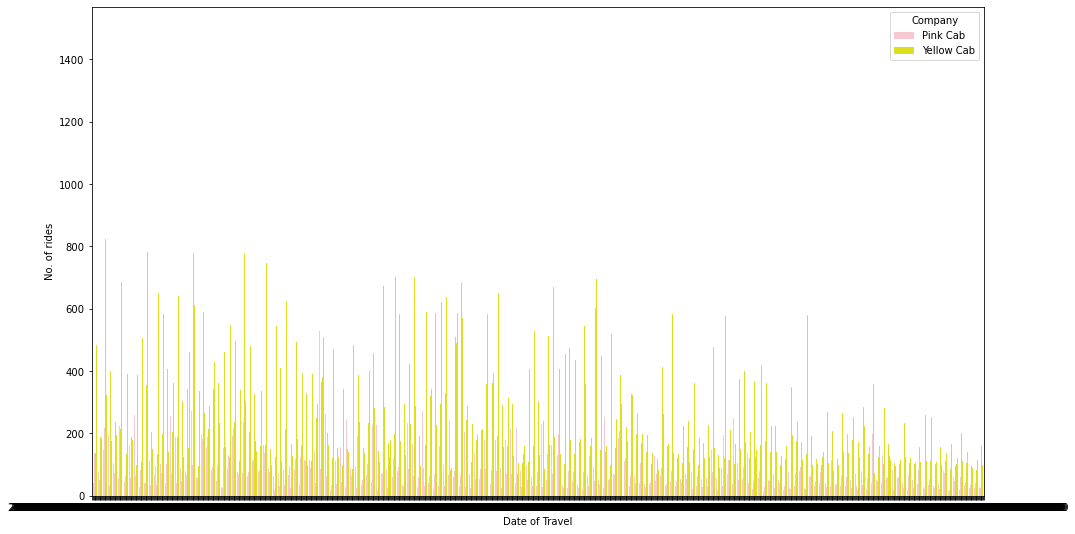

In [56]:
plt.figure(figsize=(16,9))
pd.crosstab(Masterdata['Date of Travel'], Masterdata['Company'], normalize = "index")
sns.countplot(x = Masterdata['Date of Travel'], hue = Masterdata['Company'],palette=['pink','yellow'])
plt.ylabel('No. of rides')
plt.show()

Yellow Cabs seem to have more number of rides during Days of Travel

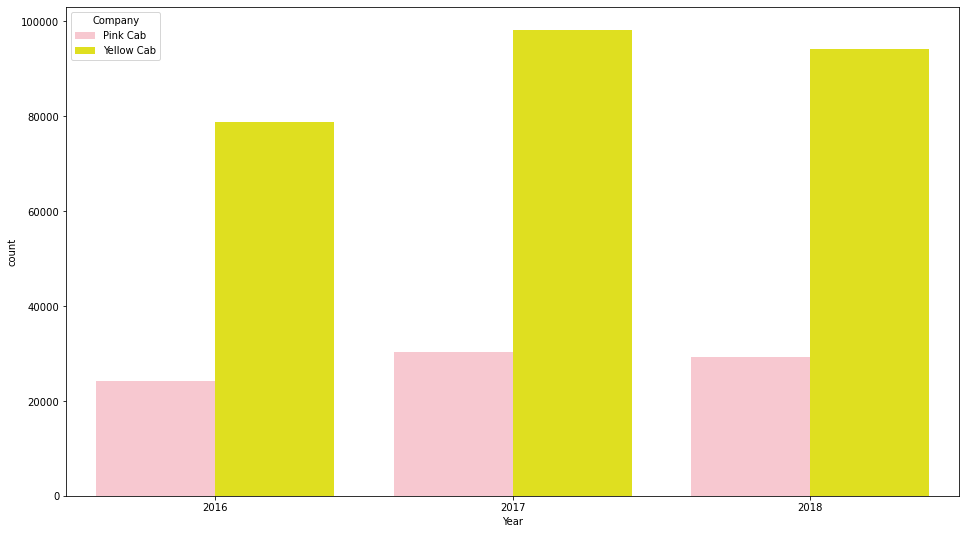

In [63]:
plt.figure(figsize=(16,9))
pd.crosstab(Masterdata['Date of Travel'], Masterdata['Company'], normalize = "index")
sns.countplot(x = Masterdata['Year'], hue = Masterdata['Company'],palette=['pink','yellow'])

Yellow Cab company have outpassed Pink Cab all the years 2016-2018 and highest rides in 2017

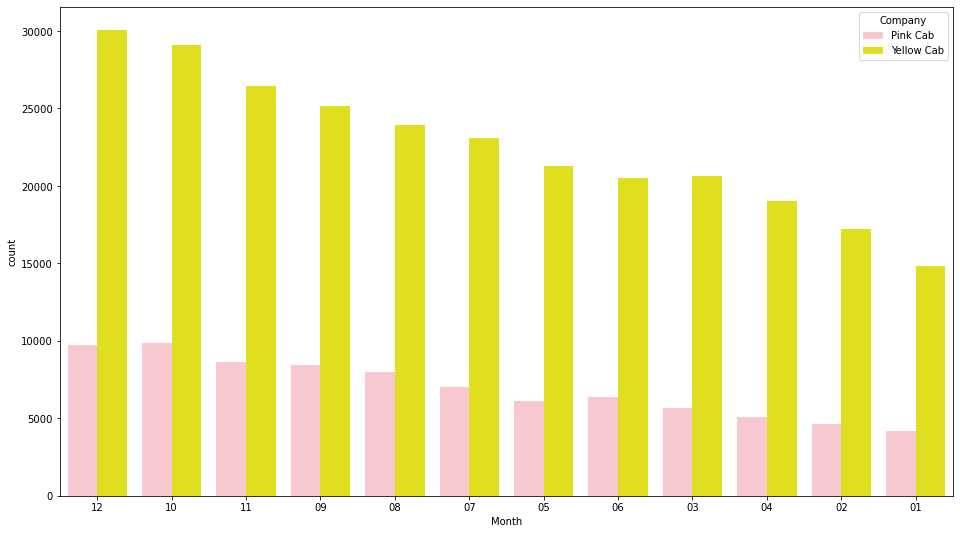

In [58]:
plt.figure(figsize=(16,9))
pd.crosstab(Masterdata['Date of Travel'], Masterdata['Company'], normalize = "index")
sns.countplot(x = Masterdata['Month'], hue = Masterdata['Company'],palette=['pink','yellow'],order=Masterdata['Month'].value_counts().index)


Cabs are at peak usage during December,October and November months and Yellow cabs are mostly preferred 

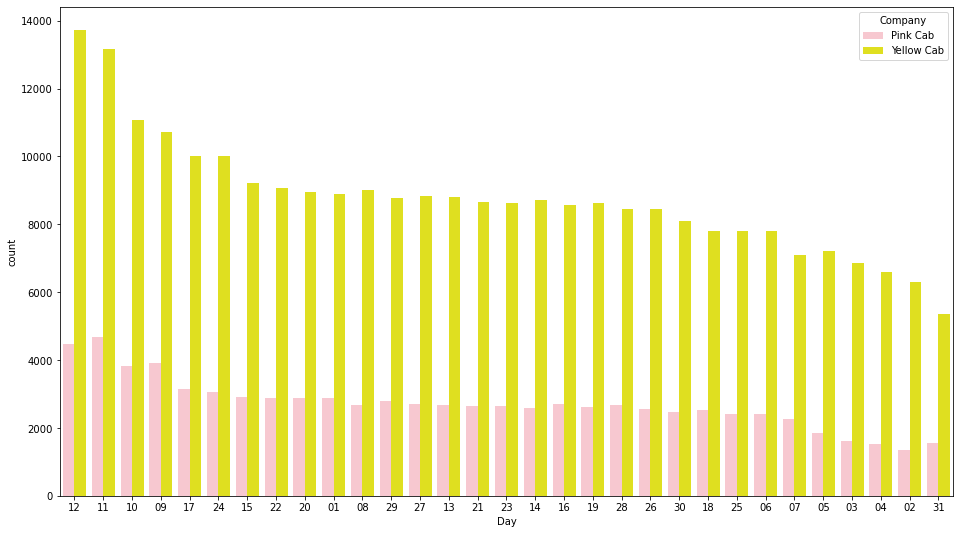

In [64]:
plt.figure(figsize=(16,9))
pd.crosstab(Masterdata['Date of Travel'], Masterdata['Company'], normalize = "index")
sns.countplot(x = Masterdata['Day'], hue = Masterdata['Company'],palette=['pink','yellow'],order=Masterdata['Day'].value_counts().index)


Cabs rides are higher during the second week of the month

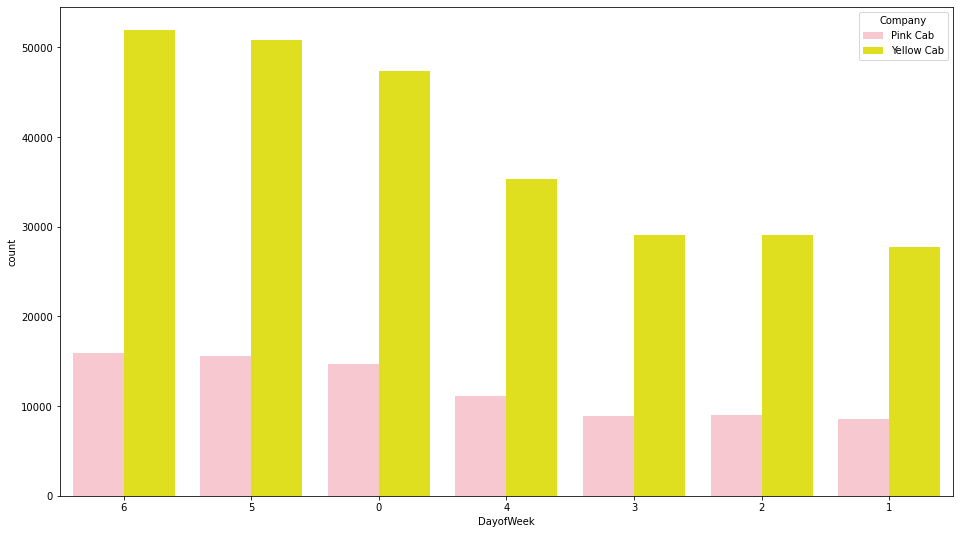

In [65]:
plt.figure(figsize=(16,9))
pd.crosstab(Masterdata['Date of Travel'], Masterdata['Company'], normalize = "index")
sns.countplot(x = Masterdata['DayofWeek'], hue = Masterdata['Company'],palette=['pink','yellow'],order=Masterdata['DayofWeek'].value_counts().index)


Cab rides clearly peak during the weekend(6-Sunday,5-Saturday,0-Monday) and Mondays

In [66]:
#KM Travelled

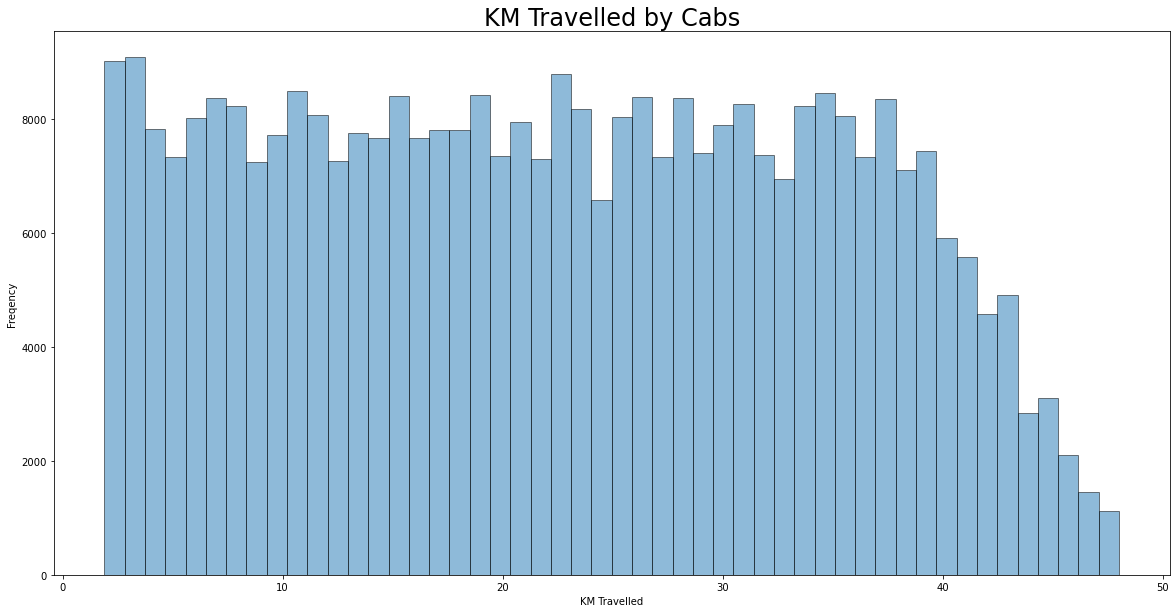

In [67]:
plt.figure(figsize=(20,10))
plt.hist(Masterdata['KM Travelled'],bins=50,alpha=0.5, histtype='bar', ec='black')
plt.title('KM Travelled by Cabs',fontsize=24)
plt.xlabel('KM Travelled')
plt.ylabel('Freqency')
plt.show()
         

Average KM Travelled-22.56 miles with a max of 48 miles and min of 1.9 miles

In [ ]:
#Price Charged

In [82]:
price=Masterdata.groupby(['Company']).sum()['Price Charged']
price.round(1)

Company
Pink Cab       26037992.8
Yellow Cab    124049069.5
Name: Price Charged, dtype: float64

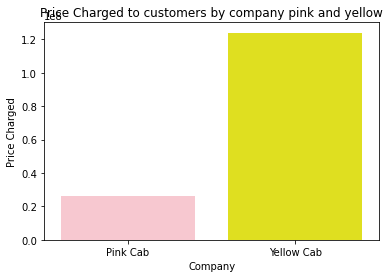

In [83]:
price=price.reset_index()
plt.title('Price Charged to customers by company pink and yellow')
sns.barplot(data=price,x='Company',y='Price Charged',palette=['pink','yellow'])
plt.show()

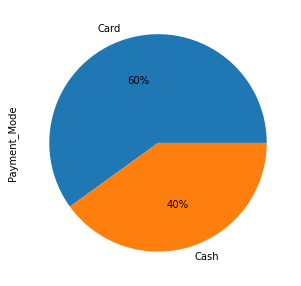

In [69]:
Masterdata.Payment_Mode.value_counts().plot.pie(y='Payment_Mode', figsize=(5, 5), autopct='%1.0f%%')


60% Customers pay for Cab rides via Card mode and 40% prefer paying by Cash

In [ ]:
#Price Charged by respective Cab companies via Mode of Payment visual:

In [77]:
modeofpay=Masterdata.groupby(['Company','Payment_Mode']).sum()['Price Charged']
modeofpay=modeofpay.reset_index()

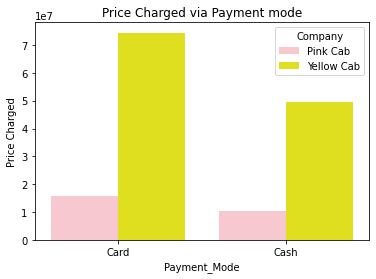

In [78]:
plt.title('Price Charged via Payment mode')
sns.barplot(data=modeofpay,hue='Company',x='Payment_Mode',y='Price Charged',palette=['pink','yellow'])
plt.show()

Among the mode of payment Yellow cab company have higher number of customers paying by Card and Cash

In [84]:
#Profit earned by respective Cab companies in each year from 2016-2018:

In [85]:
Masterdata['Date of Travel'] = pd.to_datetime(Masterdata['Date of Travel'])
Masterdata['Year'] = Masterdata['Date of Travel'].dt.strftime('%Y')
Masterdata['Month'] = Masterdata['Date of Travel'].dt.strftime('%m')
Masterdata['Day'] = Masterdata['Date of Travel'].dt.strftime('%d')
Masterdata

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Year,Month,Day,DayofWeek
0,10004281,2016-01-31,Pink Cab,CHICAGO IL,30.69,406.90,349.8660,57.0340,5323,Card,Male,33,20049,1955130,164468,2016,01,31,0
1,10009629,2016-02-13,Yellow Cab,CHICAGO IL,29.90,506.31,409.0320,97.2780,5323,Card,Male,33,20049,1955130,164468,2016,02,13,6
2,10062625,2016-12-08,Yellow Cab,CHICAGO IL,45.20,634.55,542.4000,92.1500,5323,Card,Male,33,20049,1955130,164468,2016,12,08,4
3,10065273,2016-08-14,Yellow Cab,CHICAGO IL,18.70,249.97,255.8160,-5.8460,5323,Card,Male,33,20049,1955130,164468,2016,08,14,0
4,10067889,2016-08-24,Yellow Cab,CHICAGO IL,16.83,254.35,228.2148,26.1352,5323,Card,Male,33,20049,1955130,164468,2016,08,24,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355027,10435904,2018-12-28,Yellow Cab,PHOENIX AZ,20.52,305.98,275.7888,30.1912,21845,Cash,Female,19,5342,943999,6133,2018,12,28,5
355028,10435894,2018-12-29,Yellow Cab,PHOENIX AZ,37.05,564.60,533.5200,31.0800,21873,Card,Male,23,13561,943999,6133,2018,12,29,6
355029,10435895,2018-12-29,Yellow Cab,PHOENIX AZ,26.52,391.10,378.7056,12.3944,22911,Card,Male,30,4577,943999,6133,2018,12,29,6
355030,10435903,2018-12-29,Yellow Cab,PHOENIX AZ,28.00,449.63,403.2000,46.4300,23523,Card,Male,43,15328,943999,6133,2018,12,29,6


In [87]:
profit=Masterdata.groupby(['Company']).sum()['Profit']
profit.round(1)

Company
Pink Cab       5237540.2
Yellow Cab    43251775.4
Name: Profit, dtype: float64

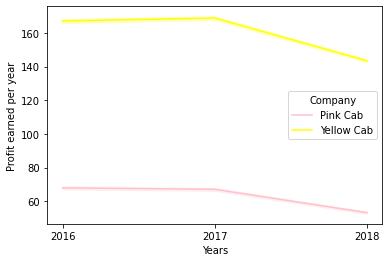

In [88]:
sns.lineplot(x='Year',y='Profit',hue='Company',data=Masterdata,palette=['pink','yellow'])
plt.xlabel('Years')
plt.ylabel('Profit earned per year')
plt.show()

Yellow Cab have higher profit over Pink Cab but both companies see a dip in profit after year 2017

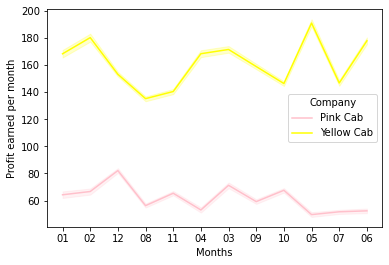

In [89]:
sns.lineplot(x='Month',y='Profit',hue='Company',data=Masterdata,palette=['pink','yellow'])
plt.xlabel('Months')
plt.ylabel('Profit earned per month')
plt.show()

Yellow Cab company soars profit during May and sees a low dip during August while Pink cab profits are high during month December and lows during May
Yellow cab has higher profit margin over pink cab company

In [90]:
#Profit wrt each Cities:

In [91]:
cityprofit=Masterdata.groupby(['City']).sum()['Profit']
cityprofit.round(1)


City
ATLANTA GA          820900.7
AUSTIN TX           520515.2
BOSTON MA          1725500.4
CHICAGO IL         3283363.4
DALLAS TX          1102749.6
DENVER CO           389077.0
LOS ANGELES CA     4302841.0
MIAMI FL            751606.8
NASHVILLE TN        146708.8
NEW YORK NY       27617219.6
ORANGE COUNTY       449841.9
PHOENIX AZ          189041.4
PITTSBURGH PA        83197.7
SACRAMENTO CA       111990.3
SAN DIEGO CA       1555399.2
SEATTLE WA          585943.6
SILICON VALLEY     1294835.4
TUCSON AZ           138081.8
WASHINGTON DC      3420501.9
Name: Profit, dtype: float64

In [92]:
cityprofit.max()

27617219.585400205

In [93]:
cityprofit.min()

83197.71700000002

The highest Profit grossing City is NEW YORK NY 27617219.6 and the lowest profit wrt City is from PITTSBURGH PA 83197.7

In [95]:
cities=Masterdata.groupby('City')
cities=cities.Profit.sum()
ind=cities.index
values=cities.values


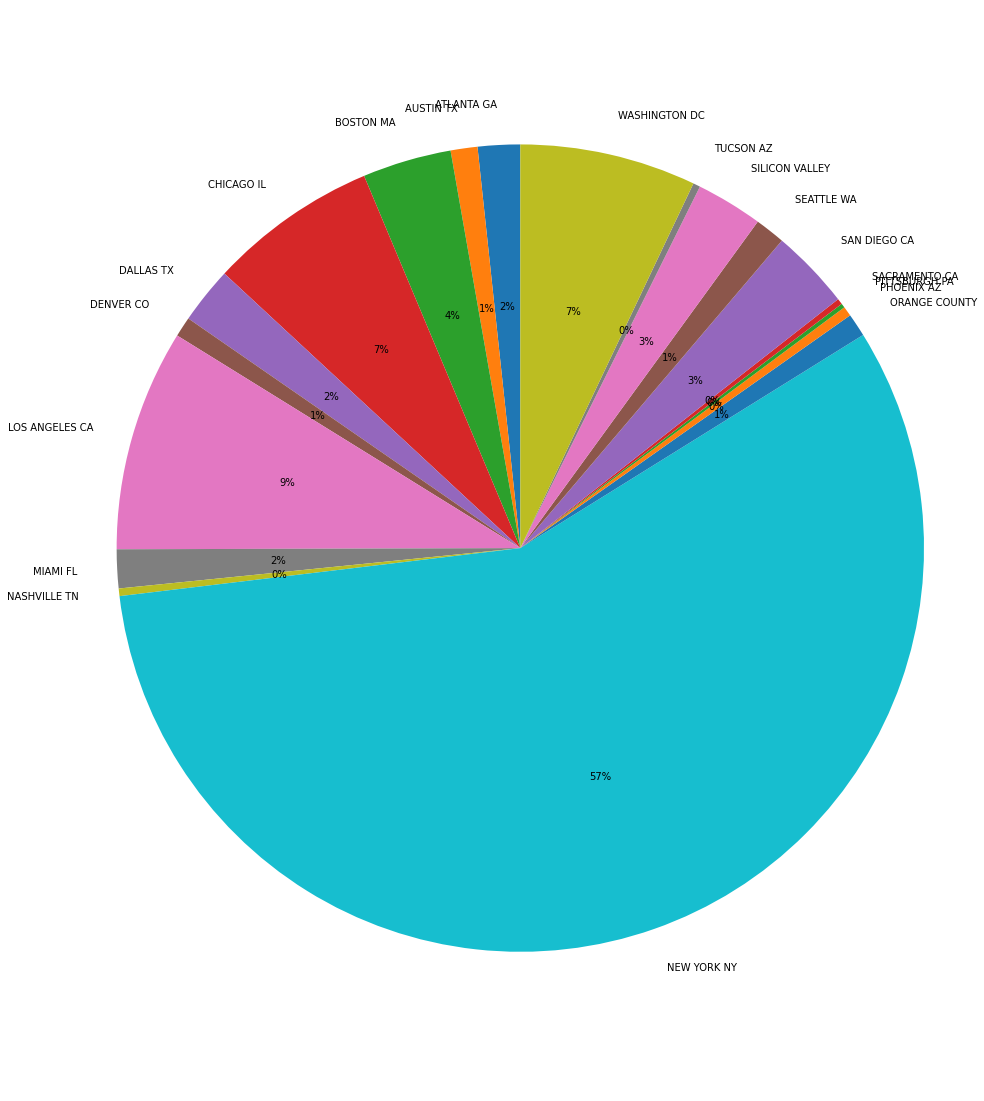

In [96]:
figp,axp=plt.subplots(figsize=(16,20))
axp.pie(values,labels=ind, autopct='%1.0f%%',startangle=90)
plt.axis('equal')
plt.show()

In [ ]:
# Customers and Users citywise and company wise:

In [97]:
users1=Masterdata.groupby(['City']).count()['Users']
#users1=users1.reset_index()

a=users1.index
b=users1.values
users1

City
ATLANTA GA         7456
AUSTIN TX          4867
BOSTON MA         29310
CHICAGO IL        55773
DALLAS TX          6911
DENVER CO          3780
LOS ANGELES CA    47453
MIAMI FL           6418
NASHVILLE TN       2989
NEW YORK NY       98925
ORANGE COUNTY      3949
PHOENIX AZ         2041
PITTSBURGH PA      1304
SACRAMENTO CA      2341
SAN DIEGO CA      20243
SEATTLE WA         7833
SILICON VALLEY     8425
TUCSON AZ          1913
WASHINGTON DC     43101
Name: Users, dtype: int64

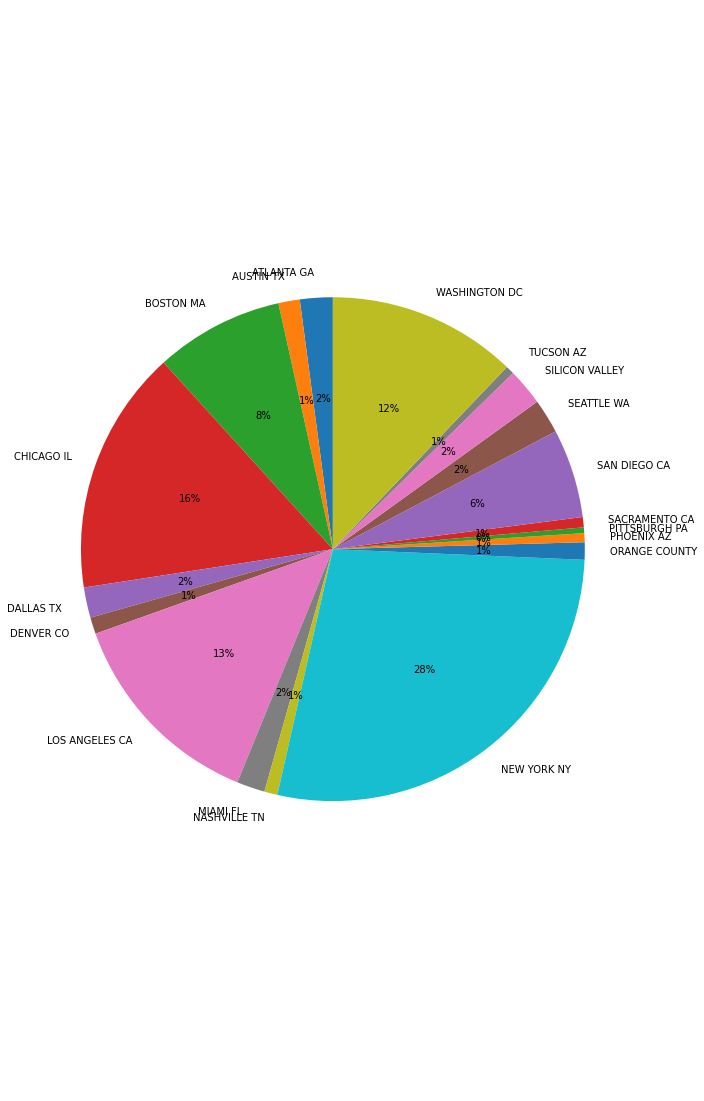

In [98]:
figp,axp=plt.subplots(figsize=(10,20))
axp.pie(b,labels=a, autopct='%1.0f%%',startangle=90)
plt.axis('equal')
plt.show()

New York NY,Chicago IL,Los Angeles CA and Washington DC contribute to the higher number of users riding cabs

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text major ticklabel objects>)

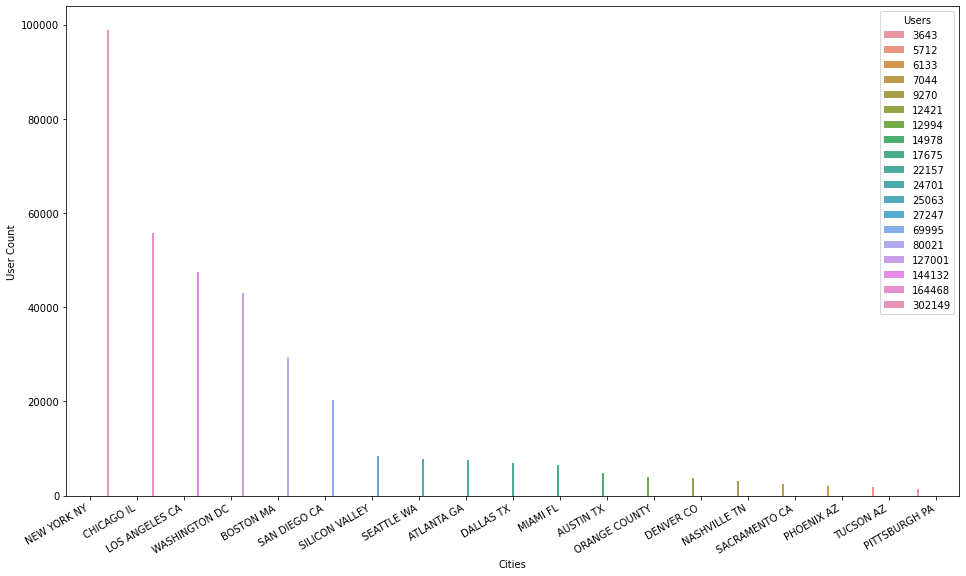

In [99]:
plt.figure(figsize=(16,9))
pd.crosstab(Masterdata['City'], Masterdata['Users'], normalize = "index")
sns.countplot(x = Masterdata['City'], hue = Masterdata['Users'], order=Masterdata['City'].value_counts().index)
plt.xlabel('Cities')
plt.ylabel('User Count')
plt.xticks(rotation=30, ha='right')

Number of users using Cab Pink and Cab Yellow:

In [2]:
compuser=Masterdata.groupby(['Company']).count()['Users']
compuser=compuser.reset_index()
compuser


NameError: name 'Masterdata' is not defined

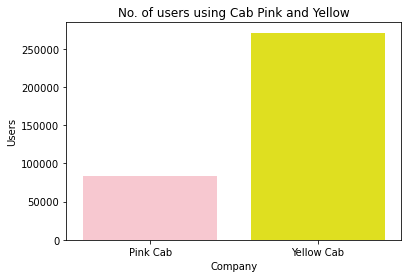

In [101]:
plt.title('No. of users using Cab Pink and Yellow')
sns.barplot(data=compuser,x='Company',y='Users',palette=['pink','yellow'])
plt.show()

Users prefer Yellow cabs

Users using respective Cab companys by Cities:

In [102]:
users2=Masterdata.groupby(['Company','City']).count()['Users']
users2=users1.reset_index()
users2


,City,Users
0,ATLANTA GA,7456
1,AUSTIN TX,4867
2,BOSTON MA,29310
3,CHICAGO IL,55773
4,DALLAS TX,6911
5,DENVER CO,3780
6,LOS ANGELES CA,47453
7,MIAMI FL,6418
8,NASHVILLE TN,2989
9,NEW YORK NY,98925


Gender based analysis:


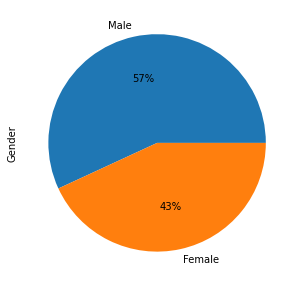

In [103]:
Masterdata.Gender.value_counts().plot.pie(y='Gender', figsize=(5, 5), autopct='%1.0f%%')

In [104]:
gender=Masterdata.groupby(['Company','Gender']).nunique()['Customer ID']
gender=gender.reset_index()
gender

,Company,Gender,Customer ID
0,Pink Cab,Female,14811
1,Pink Cab,Male,17363
2,Yellow Cab,Female,18379
3,Yellow Cab,Male,21376


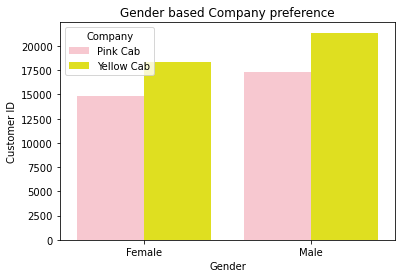

In [105]:
plt.title('Gender based Company preference')
sns.barplot(data=gender,hue='Company',x='Gender',y='Customer ID',palette=['pink','yellow'])
plt.show()

Male cab service users are higher compared to Female riders 

In [ ]:
#Gender across cities:

In [12]:
gender2=Masterdata.groupby(['City','Gender']).nunique()['Customer ID']
gender2=gender2.reset_index()
gender2

,City,Gender,Customer ID
0,ATLANTA GA,Female,1363
1,ATLANTA GA,Male,1407
2,AUSTIN TX,Female,1183
3,AUSTIN TX,Male,1232
4,BOSTON MA,Female,1345
5,BOSTON MA,Male,1655
6,CHICAGO IL,Female,1183
7,CHICAGO IL,Male,1817
8,DALLAS TX,Female,1327
9,DALLAS TX,Male,1398


In [13]:
gender2.min()

City           ATLANTA GA
Gender             Female
Customer ID           515
dtype: object

In [14]:
gender2.max()

City           WASHINGTON DC
Gender                  Male
Customer ID             1818
dtype: object

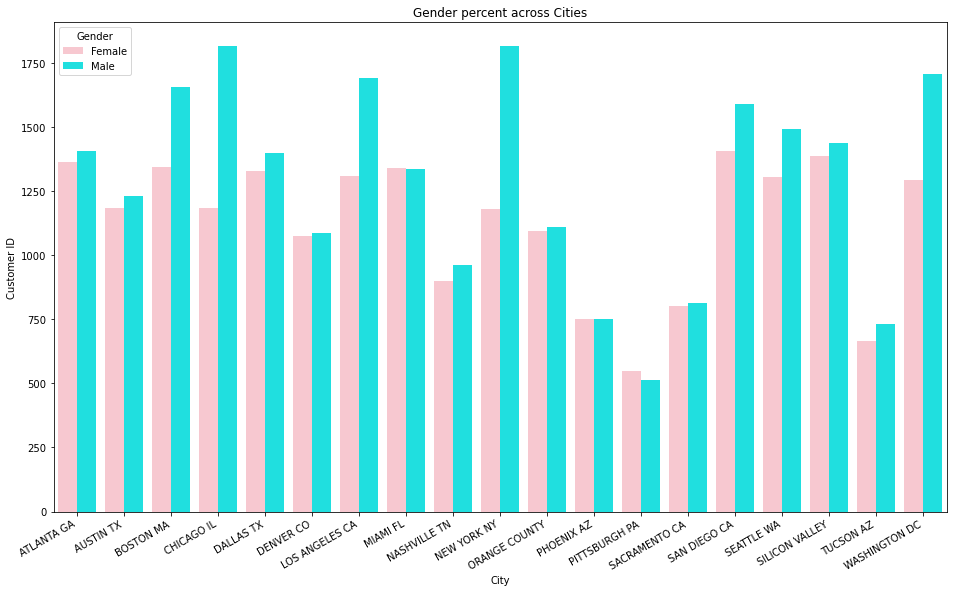

In [107]:
plt.figure(figsize=(16,9))
plt.title('Gender percent across Cities')
sns.barplot(data=gender2,hue='Gender',x='City',y='Customer ID',palette=['pink','cyan'])
plt.xticks(rotation=30, ha='right')
plt.show()

Average Age of Users:

In [109]:
age=Masterdata.groupby(['Gender']).mean()['Age']
age

Gender
Female    35.286691
Male      35.373256
Name: Age, dtype: float64

Average age of Users is 35 years

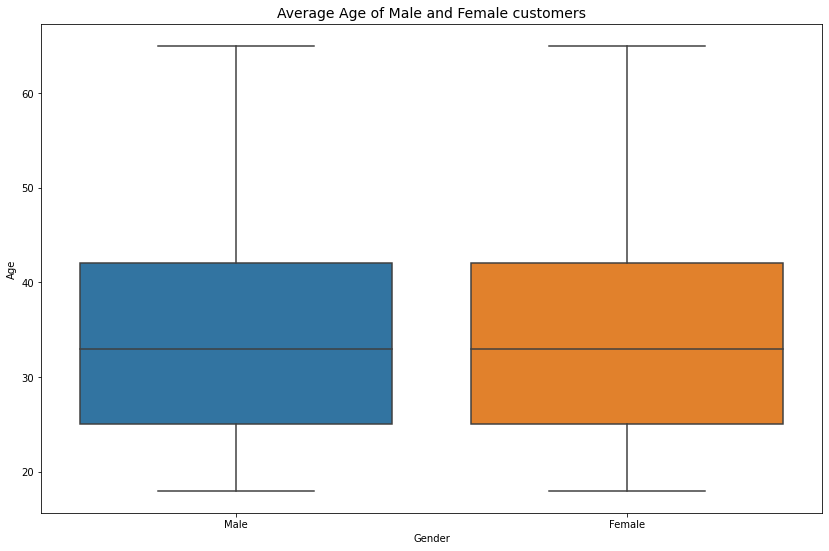

In [110]:
plt.figure(figsize=(14,9))
sns.boxplot(x='Gender', y='Age', data=Masterdata, notch=False)
plt.title('Average Age of Male and Female customers', fontsize=14)
plt.show()          

In [ ]:
#Income

In [111]:
income=Masterdata.groupby(['Company']).mean()['Income (USD/Month)']
income=income.reset_index()
income

,Company,Income (USD/Month)
0,Pink Cab,15059.327217
1,Yellow Cab,15044.818707


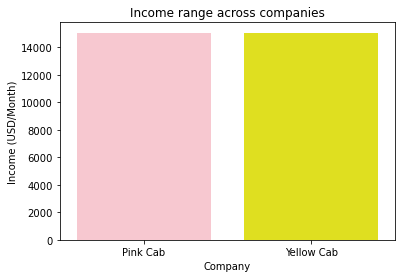

In [112]:
plt.title('Income range across companies')
sns.barplot(data=income,x='Company',y='Income (USD/Month)',palette=['pink','yellow'])
plt.show()

Average income of users is $15015.63

Users of Cab in terms of Population


In [113]:
user3=(Citydata['Users']/Citydata['Population'])*100
city=Citydata['City']

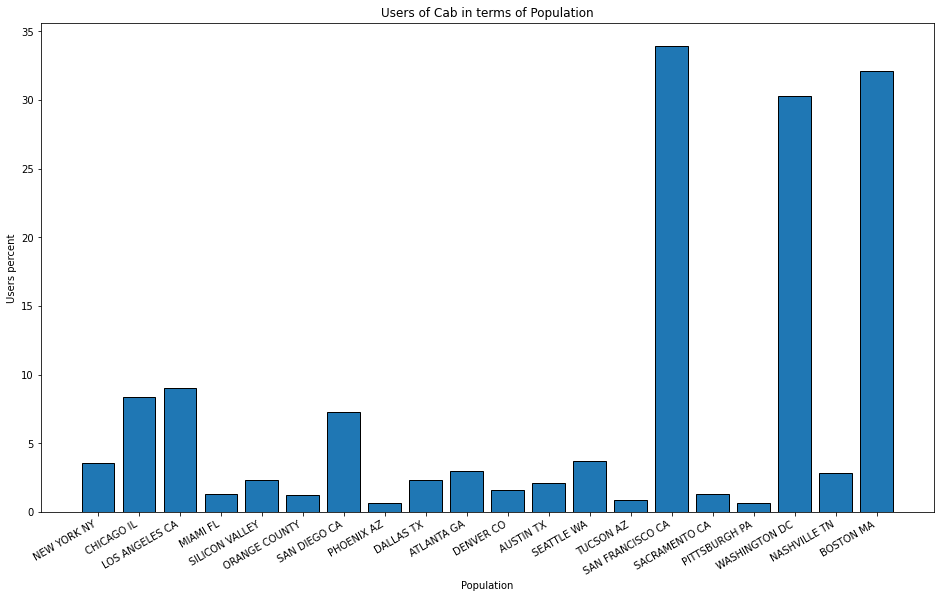

In [114]:
plt.figure(figsize=(16,9))
plt.bar(city,user3,edgecolor='black')
plt.xlabel('Population')
plt.ylabel('Users percent')
plt.title('Users of Cab in terms of Population')
plt.xticks(rotation=30, ha='right')
plt.show()

In terms of population demographics San Francisco CA,Boston MA and Washington DC are higher

# Hypothesis Testing

Null Hypothesis(H0):There is no statistically significant effect in the population
Alternative Hypothesis(H1):There is a statistically significant effect in the population

Test-Hypothesis-1-T-Test

H0: Age does not have significant effect on the Compnay chosen
H1:Age does have significant effect on the Compnay chosen

In [116]:
_,pvalue1=stats.ttest_ind(Masterdata['Age'][Masterdata['Company'] == 'Pink Cab'],
                Masterdata['Age'][Masterdata['Company'] == 'Yellow Cab'],equal_var=True)

In [117]:
print(pvalue1)

0.6852539337022452


In [118]:
if (pvalue1 < 0.05):
    print('Accept alternative H1 that Age does have significant effect on the Compnay chosen p-value <0.05')
else: print('Reject alternative H1 and accept Null hypothesis that Age does not have significant effect on the Compnay chosen p-value >0.05')

Reject alternative H1 and accept Null hypothesis that Age does not have significant effect on the Compnay chosen p-value >0.05


Test-Hypothesis-2-T-Test
Test-Hypothesis-1-T-Test

H0: Gender does not have significant effect on the Compnay profit
H1:Gender does have significant effect on the Compnay profit

In [119]:
_,pvalue2=stats.ttest_ind(Masterdata['Profit'][Masterdata['Gender'] == 'Male'],
                Masterdata['Profit'][Masterdata['Gender'] == 'Female'],equal_var=True)

In [121]:
print(pvalue2)

1.7672727166508848e-28


In [122]:
if (pvalue2 < 0.05):
    print('Accept alternative H1 that Gender does have a significant effect on the Compnay profit (p-value <0.05)')
else: print('Reject alternative H1 and accept Null hypothesis H0 that Gender does have a significant effect on the Compnay profit (p-value >0.05)')

Accept alternative H1 that Gender does have a significant effect on the Compnay profit (p-value <0.05)


In [124]:
_,pvalue3=stats.ttest_ind(Masterdata['Income (USD/Month)'][Masterdata['Company'] == 'Pink Cab'],
                Masterdata['Income (USD/Month)'][Masterdata['Company'] == 'Yellow Cab'],equal_var=True)

In [125]:
print(pvalue3)

0.6449816696126802


In [126]:
if (pvalue3 < 0.05):
    print('Accept alternative H1 that Income does have a significant effect on the Compnay preference (p-value <0.05)')
else: print('Reject alternative H1 and accept Null hypothesis H0 that Income does not have a significant effect on the Compnay preference (p-value >0.05)')

Reject alternative H1 and accept Null hypothesis H0 that Income does not have a significant effect on the Compnay preference (p-value >0.05)


Test-Hypothesis--T-Test

H0: Gender does not have significant effect on the Income
H1:Gender does have significant effect on the Income

In [130]:
_,pvalue4=stats.ttest_ind(Masterdata['Income (USD/Month)'][Masterdata['Gender']=='Female'],
                           Masterdata['Income (USD/Month)'][Masterdata['Gender']=='Male'],equal_var=True)

In [131]:
print(pvalue4)

0.5574940505012831


In [132]:
if (pvalue4 < 0.05):
    print('Accept alternative H1 that Gender does have a significant effect on the Income  (p-value <0.05)')
else: print('Reject alternative H1 and accept Null hypothesis H0 that Gender does not have a significant effect on the Income (p-value >0.05)')

Reject alternative H1 and accept Null hypothesis H0 that Gender does not have a significant effect on the Income (p-value >0.05)


Model Interpretation:

In [60]:
dataset = Masterdata.drop(columns=['Price Charged','Date of Travel','City','Company','Gender','Payment_Mode'])
response = Masterdata['Price Charged']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(dataset, response, test_size = 0.9,random_state=85 )

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (35503, 13)
Number transactions y_train dataset:  (35503,)
Number transactions X_test dataset:  (319529, 13)
Number transactions y_test dataset:  (319529,)


In [62]:
rf = RandomForestRegressor(n_estimators = 100, max_features = 'sqrt', max_depth = 5, random_state = 18).fit(X_train, y_train)

In [63]:
predict=rf.predict(X_test)

In [65]:
pd.DataFrame(np.c_[y_test , predict] , columns =['Actual' , 'Predicted'])

,Actual,Predicted
0,382.53,474.865743
1,325.38,438.733693
2,169.57,164.107435
3,998.35,911.078411
4,458.77,457.703348
...,...,...
319524,512.78,540.499792
319525,517.72,479.557140
319526,94.10,139.565327
319527,69.43,145.835666


In [69]:
r2_score(predict , y_test)

0.9266829670668392